In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seaborn for visualisation

In [34]:
df_housing = pd.read_csv("housing.csv")

In [35]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 1. Filter methods (Correlation methods)

### 1.1 For numerical variables

In [36]:
#Let's only keep the numerical variables
cols = list(df_housing.columns)
cols.remove('ocean_proximity')

In [37]:
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [38]:
#Calculate the correlation between variables
df_housing_numerical = df_housing[cols]
df_housing_numerical.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

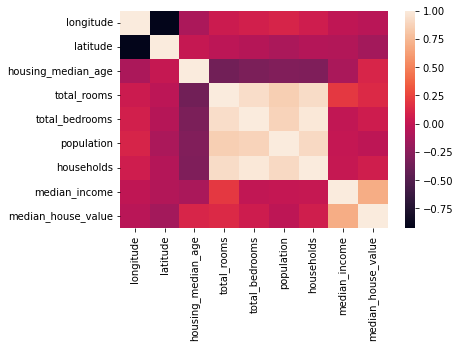

In [39]:
#Visualise these correlations as a heatmap
sns.heatmap(df_housing_numerical.corr())
#seaborn is very known to visualize data with heatmaps 

#### -  we have to fix the target variable
#### - we choose only the valuable variables that can help us predict this target
#### - keeping just the variables that have a strong correlation with our target

### since the variable are categorical then we are facing a classification problem

### 1.2 One of the variables is categorical and the other numerical:
#### ANOVA test

In [40]:
#in this case we are assuming that the target variable is categorical
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [41]:
#Specifying the dependent variables and the independant ones
X = df_housing[cols] 
y = df_housing['ocean_proximity']#target
X = X.fillna(X.mean())

In [42]:
#Configure to select all features
fs = SelectKBest(score_func=f_classif,k='all')
#Learn relationship from data
f = fs.fit(X,y)

In [43]:
f.scores_

array([1827.9884879 , 2572.84562964,  560.20235918,    5.44930669,
          2.99745439,   38.00245503,   11.57609269,  317.2904522 ,
       1612.14073588])

Feature 0: 1827.988488
Feature 1: 2572.845630
Feature 2: 560.202359
Feature 3: 5.449307
Feature 4: 2.997454
Feature 5: 38.002455
Feature 6: 11.576093
Feature 7: 317.290452
Feature 8: 1612.140736


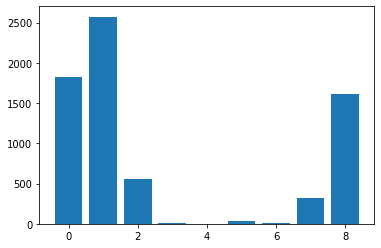

In [44]:
#What are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i,fs.scores_[i]))
#plot the scores
plt.bar([i for i in range(len(f.scores_))], fs.scores_)
plt.show()

### we can see that some features's score is better that means that they have a larger impact on our target variable then other features such as : feature 0,1 and 8

### 1.3 Categorical Input, Categorical Output:

In [45]:
#we are going to use the chi_square test => This test is one of the known tests for hypotheses in methods
df_titanic = pd.read_csv("titanic.csv")

In [46]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
# Now in chi-test we will be setting the target variable as the "survived" variable
cols2 = list(df_titanic.columns)
cols2.remove("Survived")
cols2.remove("Name")
x = df_titanic[cols2]
y = df_titanic["Survived"]

In [48]:
# we will be removing the Name variable because we don't need it
#And to convert the Sex variable to a nemurical one
#Hot encode the sex variable
x = pd.get_dummies(x,columns=["Sex"])
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [49]:
#The dummy variables Sex_female and Sex_male are correlated so we only need a one
x.drop("Sex_male", axis=1,inplace=True)

In [50]:
x.drop("PassengerId", axis=1 ,inplace=True)
x.drop("Ticket", axis=1 ,inplace=True)
x.drop("Cabin", axis=1 ,inplace=True)
x.drop("Embarked", axis=1 ,inplace=True)

In [52]:
x.dropna(inplace = True)

In [53]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,1
411,1,37.0,1,0,90.0000,1
412,3,28.0,0,0,7.7750,1
414,1,39.0,0,0,108.9000,1


In [60]:
#Let's just change the label of the Sex_female into "Sex"
X.rename(columns={'Sex_female' : 'Sex'}, inplace = True)
X[ X < 0] = 0

In [61]:
from sklearn.feature_selection import chi2
#let's perform test
test = chi2(X,y)
# couldn't execute this because it has Negative variables, so we have to remove them before using chi2 test

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20640 is different from 418)

In [63]:
#These are chi2 stats for each variable
def print_chi2_results(results, alpha= 0.05):
    for e in range(len(results)):
        if results[e] <= alpha and results[e]>0:
            print("we can not conclude that the feature {} is statistically associated with the target ".format(e))
        else: 
            print("The feature {} has a statistically significant association with the target ".format(e))

In [64]:
print_chi2_results(test[0])

NameError: name 'test' is not defined

### 2.2 Wrapper methos
### 2.3 Embedded methods